In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('data/diabetes_final.csv')

In [3]:
data.head()

,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35,33.6,0.627,50,1
1,1,85,29,26.6,0.351,31,0
2,8,183,23,23.3,0.672,32,1
3,1,89,23,28.1,0.167,21,0
4,0,137,35,43.1,2.288,33,1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Outcome',axis=1))
scaled_features = scaler.transform(data.drop('Outcome',axis=1))

In [5]:
scaled_features[0]

array([0.63994726, 0.86604475, 0.83111367, 0.16724016, 0.46849198,
       1.4259954 ])

In [6]:
X = scaled_features
y = data['Outcome']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
scaler_mm.fit(data.drop('Outcome',axis=1))
scaled_features_mm = scaler_mm.transform(data.drop('Outcome',axis=1))

In [8]:
scaled_features_mm[0]

array([0.35294118, 0.67096774, 0.30434783, 0.31492843, 0.23441503,
       0.48333333])

In [9]:
X_mm = scaled_features_mm

In [10]:
k = 5 # k in kfold cross validation 

In [11]:
# plots style
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

** SVC ** 

In [12]:
from sklearn.svm import SVC

In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [14]:
#{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
# {'file': 'diabetes_average.csv', 'scaler': 'std', 'score': 0.8051948051948052, 'params': {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}}
svc_model = SVC(C=0.1, gamma='auto', kernel='linear')

In [15]:
predictions = cross_val_predict(svc_model, X, y, cv=k)
score = cross_val_score(svc_model, X, y, scoring='accuracy', cv = k)
svc_accuracy = score.mean() * 100

In [16]:
print(score)

[0.74675325 0.75324675 0.78571429 0.79084967 0.75816993]


In [17]:
print("SVC accuracy: {}".format(svc_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

SVC accuracy: 76.69467787114846
             precision    recall  f1-score   support

          0       0.78      0.89      0.83       500
          1       0.72      0.54      0.62       268

avg / total       0.76      0.77      0.76       768

[[444  56]
 [123 145]]


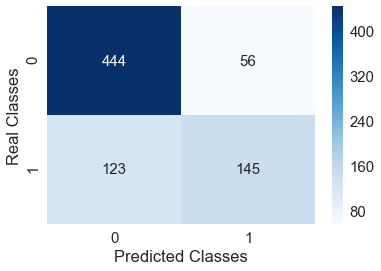

In [18]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Blues",fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('doc/images/confusion_svc.jpg', dpi = 300)

** KNN Classifier ** 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)

In [21]:
predictions = cross_val_predict(knn, X, y, cv=k)
score = cross_val_score(knn, X, y, scoring='accuracy', cv=k)
knn_accuracy = score.mean() * 100

In [22]:
print(score)

[0.75974026 0.70779221 0.72077922 0.75816993 0.7124183 ]


In [23]:
print("KNN accuracy: {}".format(knn_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

KNN accuracy: 73.17799847211613
             precision    recall  f1-score   support

          0       0.78      0.83      0.80       500
          1       0.63      0.55      0.59       268

avg / total       0.73      0.73      0.73       768

[[414  86]
 [120 148]]


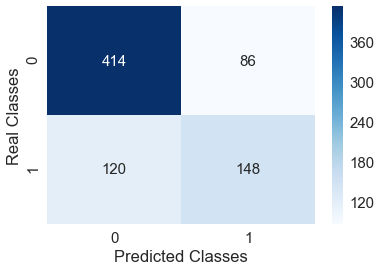

In [24]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Blues",fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('doc/images/confusion_knn.jpg', dpi = 300)

** Decision Tree Classifier **

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [26]:
predictions = cross_val_predict(dtree, X,y, cv=k)
score = cross_val_score(dtree, X, y, scoring='accuracy', cv = k)
dtree_accuracy = score.mean() * 100

In [27]:
print(score)

[0.7012987  0.64285714 0.65584416 0.71895425 0.70588235]


In [28]:
print("Decision Tree accuracy: {}".format(dtree_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

Decision Tree accuracy: 68.49673202614379
             precision    recall  f1-score   support

          0       0.75      0.76      0.76       500
          1       0.54      0.53      0.54       268

avg / total       0.68      0.68      0.68       768

[[380 120]
 [125 143]]


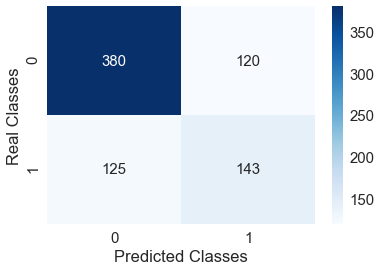

In [29]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Blues",fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('doc/images/confusion_dtree.jpg', dpi = 300)

** Random Forest Classifier **

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)

In [31]:
predictions = cross_val_predict(rfc, X,y, cv=k)
score = cross_val_score(rfc, X, y, scoring='accuracy', cv = k)
rfc_accuracy = score.mean() * 100

In [32]:
print(score)

[0.73376623 0.73376623 0.74675325 0.80392157 0.7254902 ]


In [33]:
print("Random Forest accuracy: {}".format(rfc_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

Random Forest accuracy: 74.87394957983193
             precision    recall  f1-score   support

          0       0.79      0.85      0.82       500
          1       0.67      0.57      0.61       268

avg / total       0.74      0.75      0.75       768

[[423  77]
 [115 153]]


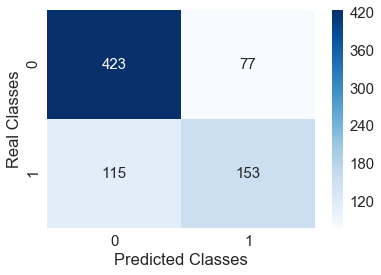

In [34]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Blues",fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('doc/images/confusion_rfc.jpg', dpi = 300)

** Logistic Regression  **

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [36]:
predictions = cross_val_predict(logmodel, X,y, cv=k)
score = cross_val_score(logmodel, X, y, scoring='accuracy', cv = k)
log_accuracy = score.mean() * 100

In [37]:
print(score)

[0.76623377 0.74675325 0.78571429 0.79738562 0.75816993]


In [38]:
print("Logistic Regression accuracy: {}".format(log_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

Logistic Regression accuracy: 77.08513708513708
             precision    recall  f1-score   support

          0       0.79      0.88      0.83       500
          1       0.72      0.56      0.63       268

avg / total       0.77      0.77      0.76       768

[[441  59]
 [117 151]]


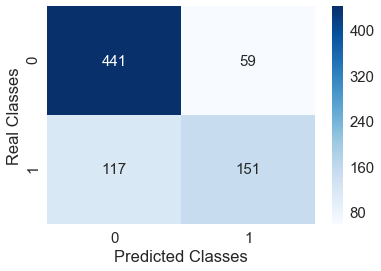

In [39]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Blues",fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('doc/images/confusion_log.jpg', dpi = 300)

** Gaussian Naive Bayes  **

In [40]:
from sklearn.naive_bayes import GaussianNB
gnbmodel = GaussianNB()

In [41]:
predictions = cross_val_predict(gnbmodel, X,y, cv=k)
score = cross_val_score(gnbmodel, X, y, scoring='accuracy', cv = k)
gnb_accuracy = score.mean() * 100

In [42]:
print(score)

[0.74675325 0.72727273 0.76623377 0.80392157 0.75163399]


In [43]:
print("Gaussian Naive Bayes accuracy: {}".format(gnb_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

Gaussian Naive Bayes accuracy: 75.91630591630592
             precision    recall  f1-score   support

          0       0.80      0.84      0.82       500
          1       0.67      0.61      0.64       268

avg / total       0.76      0.76      0.76       768

[[419  81]
 [104 164]]


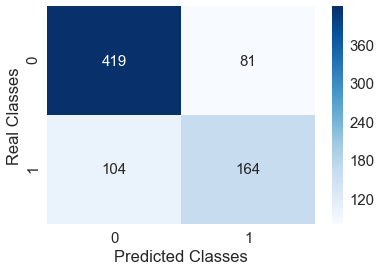

In [44]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Blues", fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('doc/images/confusion_gnb.jpg', dpi = 300)

#### Classificators summary

In [45]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}%'.format(height), ha=ha[xpos], va='bottom')

In [46]:
x_bar = ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gaussian Naive Bayes']
y_bar = [svc_accuracy, knn_accuracy, dtree_accuracy, rfc_accuracy, log_accuracy, gnb_accuracy]
y_bar = [round(i, 2) for i in y_bar]

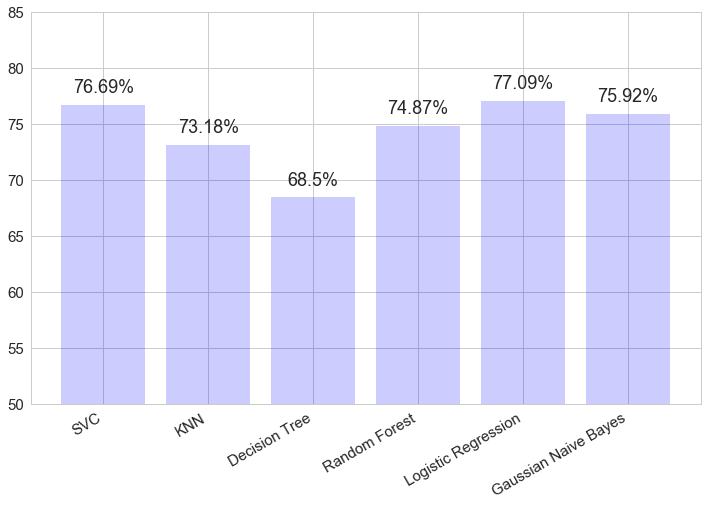

In [47]:
from matplotlib import cm
f, ax = plt.subplots(1,1, figsize=(12,8))
f.autofmt_xdate()
ax.set_ylim(50,85)
g = plt.bar(x_bar, y_bar, alpha=0.2, color=cm.bwr_r(y_bar))
autolabel(g)   
plt.savefig('doc/images/classificators_accuracy.jpg', dpi = 300)